# Matplotlib - Vad väljer vi?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("resultat_städad.csv")
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student          78 non-null     object 
 1   studietimmar     78 non-null     float64
 2   provpoäng        78 non-null     float64
 3   klass            78 non-null     object 
 4   poang_per_timme  74 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.2+ KB


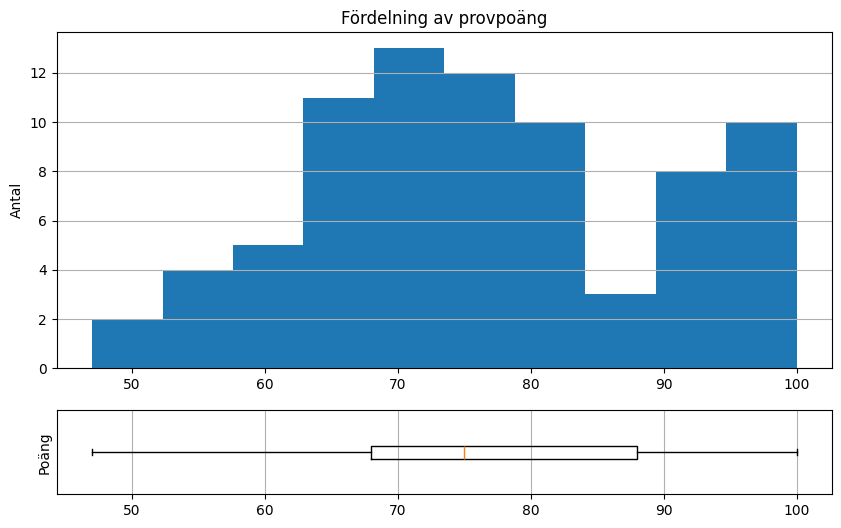

In [22]:
x = df["provpoäng"].dropna()

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={"height_ratios":[4,1]})

ax_hist.hist(x, bins=10)
ax_hist.set_title("Fördelning av provpoäng")
ax_hist.set_ylabel("Antal")
ax_hist.grid(True, axis="y")

ax_box.boxplot(x, vert=False)
ax_box.set_ylabel("Poäng")
ax_box.set_yticks([])
ax_box.grid(True, axis="x")

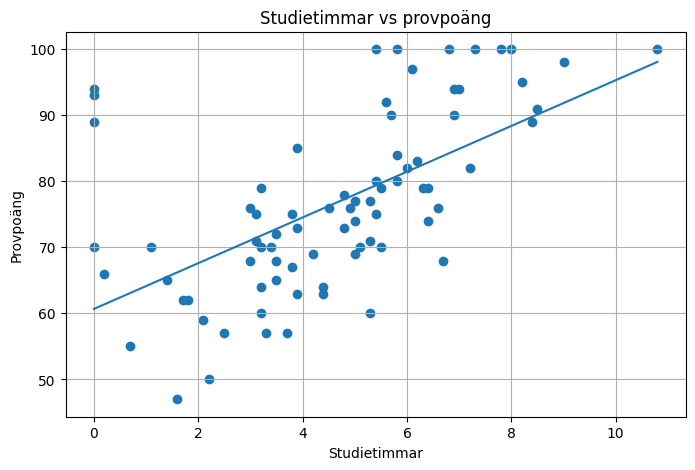

In [28]:
x = df["studietimmar"].to_numpy()
y = df["provpoäng"].to_numpy()

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y)

k, m = np.polyfit(x, y, 1)
ix = np.argsort(x)
ax.plot(x[ix], (k*x + m)[ix])

ax.set_title("Studietimmar vs provpoäng")
ax.set_xlabel("Studietimmar")
ax.set_ylabel("Provpoäng")
ax.grid(True)

<Axes: xlabel='student'>

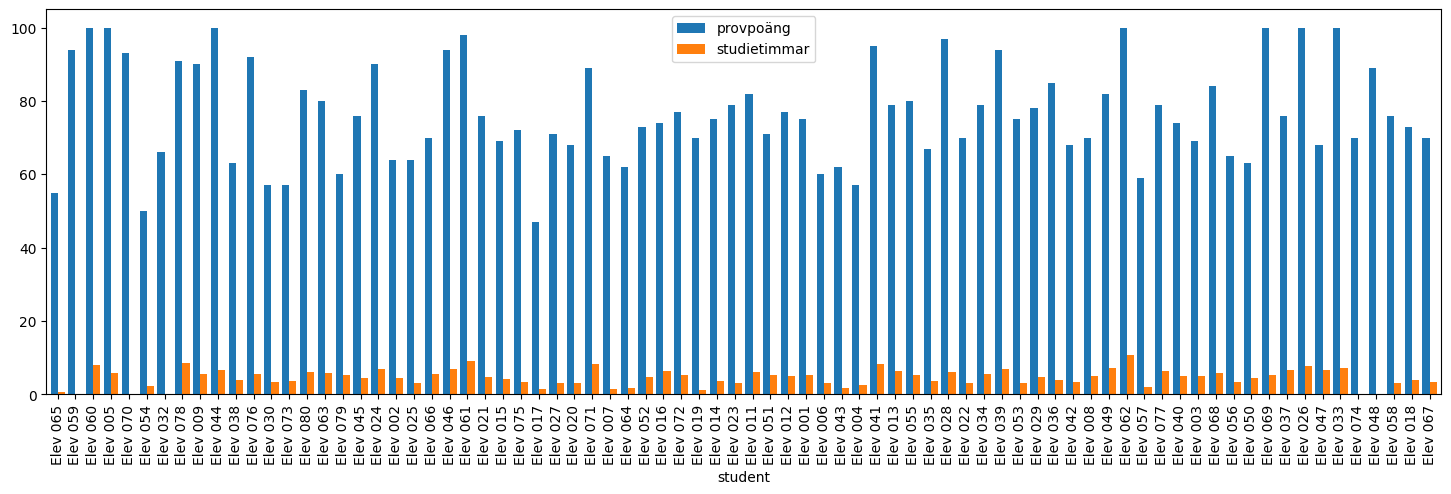

In [51]:
take = df[["student", "provpoäng", "studietimmar"]].dropna().copy()

take.plot(x="student", y=["provpoäng", "studietimmar"], kind="bar", figsize=(18, 5), width=0.8)

# fig, ax = plt.subplots(figsize=(18,5))

# idx = np.arange(len(take))
# width = 0.45

# ax.bar(idx - width/2, take["provpoäng"], width=width, label="Provpoäng")
# ax.bar(idx + width/2, take["studietimmar"], width=width, label="Studietimmar")

# ax.set_xticks(idx)
# ax.set_xticklabels(take["student"], rotation=75, ha="right")
# ax.set_title("Poäng vs Timmar")
# ax.set_ylabel("Värde")
# ax.grid(True, axis="y")
# ax.legend()


<Axes: xlabel='student'>

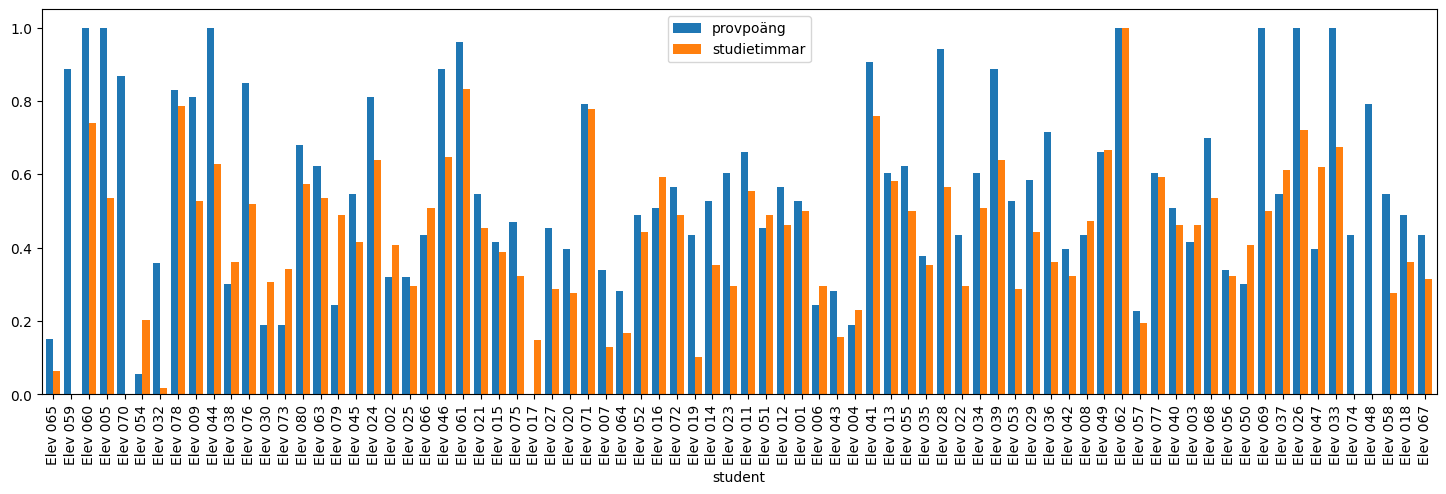

In [59]:
def minmax(s):
    rng = s.max() - s.min()
    return (s - s.min()) / rng if rng != 0 else s - s.min()

norm = take.copy()
norm["provpoäng"] = minmax(norm["provpoäng"])
norm["studietimmar"] = minmax(norm["studietimmar"])

norm.plot(x="student", y=["provpoäng", "studietimmar"], kind="bar", figsize=(18, 5), width=0.8)

# print(norm[["provpoäng", "studietimmar"]].agg(["min", "max"]))

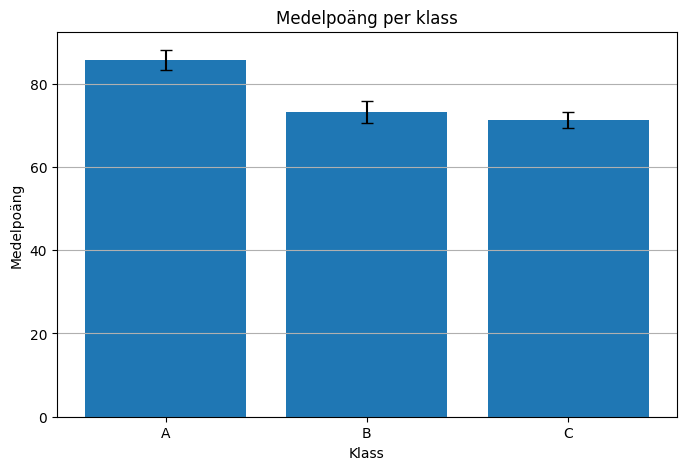

In [60]:
summary = (df.groupby("klass", dropna=False)
           .agg(
               medel=("provpoäng", "mean"),
               std=("provpoäng", "std"),
               n=("student", "count")
           ).reset_index())

se = summary["std"] / np.sqrt(summary["n"])

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(summary["klass"], summary["medel"], yerr=se, capsize=4)
ax.set_title("Medelpoäng per klass")
ax.set_xlabel("Klass")
ax.set_ylabel("Medelpoäng")
ax.grid(True, axis="y")

Text(0, 0.5, 'Poäng')

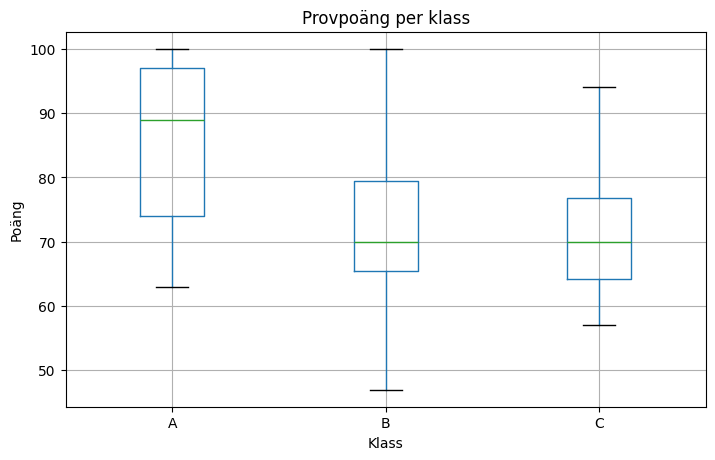

In [63]:
fig, ax = plt.subplots(figsize=(8, 5))
df.boxplot(column="provpoäng", by="klass", ax=ax)
ax.set_title("Provpoäng per klass")
plt.suptitle("")
ax.set_xlabel("Klass")
ax.set_ylabel("Poäng")

In [66]:
bins = [0, 60, 80, 100]
df_copy = df.copy()

df_copy["poäng_intervall"] = pd.cut(
    df_copy["provpoäng"],
    bins=bins,
    right=True,
    include_lowest=True
)

andelar = pd.crosstab(
    df_copy["klass"],
    df_copy["poäng_intervall"],
    normalize="index"
).round(2)

andelar

poäng_intervall,"(-0.001, 60.0]","(60.0, 80.0]","(80.0, 100.0]"
klass,,,
A,0.00,0.40,0.60
B,0.19,0.59,0.22
C,0.15,0.69,0.15


- Fördelning (1 numeriskt): Histogram + boxplot
- Samband (2 numeriska): Scatter + visuell trendline
- Mönster (2 numeriska): Två stapelserier sida vid sida, Normaliserade (0 - 1)
- Grupper (kateg x numerisk): Groupby-tabell + staplar och/eller boxplot
- Andelar (kateg x kateg): cut + crosstab(normalise="index")